<a href="https://colab.research.google.com/github/waghashvini/Test/blob/master/RiceLeaf_disease_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import Libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [ ]:
#1) extract ZIP file
import zipfile
import os

#  Path to your ZIP file (change as needed)
zip_path = "/content/rice_leaf_dataset.zip"

#  Where to extract
extract_to = "/content/"

#  Extract ZIP
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print(f" Extracted to folder: {extract_to}")


 Extracted to folder: /content/


1. Introduction

Rice is one of the most essential crops globally, and early detection of leaf diseases can prevent crop loss. In this project, we develop a Convolutional Neural Network (CNN) to classify rice leaf images into multiple disease categories:

1) Bacterial Leaf Blight

2) Brown Spot

3) Leaf Smut

2. Dataset Overview

Source: https://d3ilbtxij3aepc.cloudfront.net/projects/CDS-Capstone-Projects/PRCP-1001-RiceLeaf.zip

Total Classes: 3

Image Format: JPG

Folder Structure:

    rice_leaf_dataset/
      BacterialLeafBlight/
      BrownSpot/
      LeafSmut/

3. Exploratory Data Analysis (EDA)

   Class Distribution:

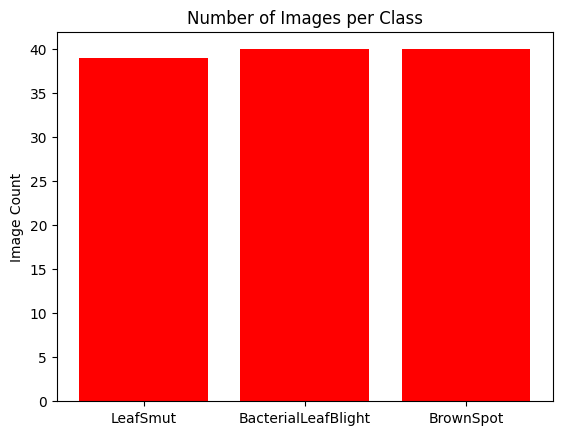

In [ ]:
import os
import matplotlib.pyplot as plt

base_path = 'rice_leaf_dataset'
classes = os.listdir(base_path)
class_counts = {cls: len(os.listdir(os.path.join(base_path, cls))) for cls in classes}

plt.bar(class_counts.keys(), class_counts.values(), color='red')
plt.title("Number of Images per Class")
plt.ylabel("Image Count")
plt.show()

Insight : Data is more balanced

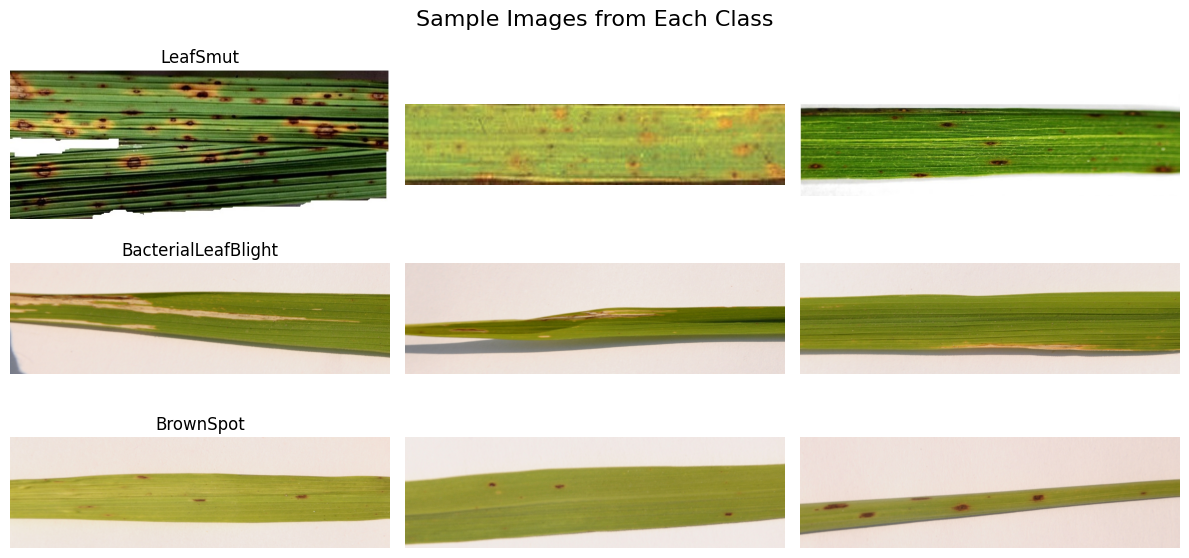

In [ ]:
#2. Display sample images from each class
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

#  Path to dataset
dataset_path = "/content/rice_leaf_dataset"

#  Number of sample images to show per class
samples_per_class = 3

#  Plot settings
plt.figure(figsize=(12, 6))
class_folders = os.listdir(dataset_path)

for class_index, class_name in enumerate(class_folders):
    class_path = os.path.join(dataset_path, class_name)
    image_files = [
        f for f in os.listdir(class_path)
        if f.lower().endswith(('.jpg', '.jpeg', '.png'))
    ]

    # Display a few sample images
    for i in range(samples_per_class):
        image_path = os.path.join(class_path, image_files[i])
        img = mpimg.imread(image_path)

        plt.subplot(len(class_folders), samples_per_class, class_index * samples_per_class + i + 1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(class_name if i == 0 else "")

plt.suptitle("Sample Images from Each Class", fontsize=16)
plt.tight_layout()
plt.show()

#in this Code Does:
#Loops through each disease class folder

#Picks 3 images from each

#Uses matplotlib to plot them in a grid

#Displays them with class titles

The dataset is fairly balanced across all classes.

**Random Forest model**

In [ ]:
#1. Import Libraries
import os
import cv2
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#2. Load and Flatten Image Data
IMG_SIZE = 128
DATA_DIR = "/content/rice_leaf_dataset"  # e.g., 'rice_leaf_dataset'

X = []
y = []

for label in os.listdir(DATA_DIR):
    folder_path = os.path.join(DATA_DIR, label)
    for file in os.listdir(folder_path):
        img_path = os.path.join(folder_path, file)
        img = cv2.imread(img_path)
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        X.append(img.flatten())  # flatten for ML
        y.append(label)

X = np.array(X)
y = np.array(y)
print(" Dataset loaded:", X.shape, y.shape)



 Dataset loaded: (119, 49152) (119,)


In [ ]:
#3. Encode Labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)
class_names = le.classes_
print("Classes:", class_names)


Classes: ['BacterialLeafBlight' 'BrownSpot' 'LeafSmut']


In [ ]:
#4. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42
)


In [ ]:
#5. Train Random Forest
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

                     precision    recall  f1-score   support

BacterialLeafBlight       0.86      0.75      0.80         8
          BrownSpot       0.64      0.88      0.74         8
           LeafSmut       1.00      0.75      0.86         8

           accuracy                           0.79        24
          macro avg       0.83      0.79      0.80        24
       weighted avg       0.83      0.79      0.80        24



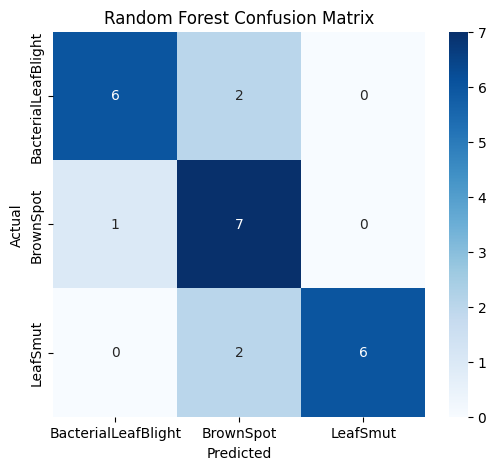

In [ ]:
#6. Evaluate the Model
y_pred = clf.predict(X_test)

# Classification Report
print(classification_report(y_test, y_pred, target_names=class_names))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix')
plt.show()


**SVM Model**

In [ ]:
from sklearn.svm import SVC
#Train SVM Model
clf = SVC(kernel='rbf', C=10, gamma='scale')  # RBF kernel is nonlinear
clf.fit(X_train, y_train)

SVC(C=10)


📋 Classification Report:
                     precision    recall  f1-score   support

BacterialLeafBlight       0.75      0.75      0.75         8
          BrownSpot       0.70      0.88      0.78         8
           LeafSmut       0.83      0.62      0.71         8

           accuracy                           0.75        24
          macro avg       0.76      0.75      0.75        24
       weighted avg       0.76      0.75      0.75        24



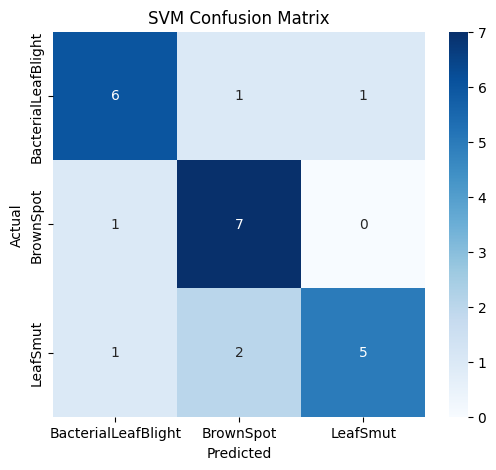

In [ ]:
#Evaluate Performance
y_pred = clf.predict(X_test)

print("\n📋 Classification Report:")
print(classification_report(y_test, y_pred, target_names=class_names))

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("SVM Confusion Matrix")
plt.show()


**CNN Code for Rice Leaf Disease Classification**

In [ ]:
#Step 1: Import Required Libraries
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import cv2


In [ ]:
#Step 2: Load and Preprocess Image Data
IMG_SIZE = 128
DATA_DIR = "/content/rice_leaf_dataset"  # <- Replace with your dataset path

X = []
y = []
class_names = os.listdir(DATA_DIR)

for label, class_name in enumerate(class_names):
    class_folder = os.path.join(DATA_DIR, class_name)
    for file in os.listdir(class_folder):
        img_path = os.path.join(class_folder, file)
        img = cv2.imread(img_path)
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
        X.append(img)
        y.append(label)

X = np.array(X) / 255.0  # Normalize to [0, 1]
y = to_categorical(np.array(y), num_classes=3)
print(" Loaded dataset:", X.shape, y.shape)


 Loaded dataset: (119, 128, 128, 3) (119, 3)


In [ ]:
#Step 3: Split into Train, Validation, Test Sets
x_train, x_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
x_valid, x_test, y_valid, y_test = train_test_split(x_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

print("Train:", x_train.shape, "Valid:", x_valid.shape, "Test:", x_test.shape)


Train: (83, 128, 128, 3) Valid: (18, 128, 128, 3) Test: (18, 128, 128, 3)


In [ ]:
#tep 4: Define the CNN Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(128, 128, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),

    Dropout(0.3),
    Flatten(),

    Dense(128, activation='relu'),
    Dropout(0.4),

    Dense(3, activation='softmax')  # 3 output classes
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_21 (Conv2D)              │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 128)            │     4,194,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,288,067 (16.36 MB)

 Trainable params: 4,288,067 (16.36 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Step 5: Train the Model
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint("best_rice_model.h5", save_best_only=True, monitor='val_accuracy', mode='max')

history = model.fit(
    x_train, y_train,
    validation_data=(x_valid, y_valid),
    epochs=20,
    batch_size=16,
    shuffle=True,
    callbacks=[checkpoint]
)


Epoch 1/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 731ms/step - accuracy: 0.2902 - loss: 2.5141

6/6 ━━━━━━━━━━━━━━━━━━━━ 7s 895ms/step - accuracy: 0.2866 - loss: 2.4867 - val_accuracy: 0.3333 - val_loss: 1.0995
Epoch 2/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 470ms/step - accuracy: 0.3368 - loss: 1.0997

6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 561ms/step - accuracy: 0.3403 - loss: 1.0991 - val_accuracy: 0.5556 - val_loss: 1.0874
Epoch 3/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 466ms/step - accuracy: 0.3657 - loss: 1.0870

6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 568ms/step - accuracy: 0.3668 - loss: 1.0871 - val_accuracy: 0.6667 - val_loss: 1.0559
Epoch 4/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 563ms/step - accuracy: 0.5007 - loss: 1.0561 - val_accuracy: 0.6667 - val_loss: 0.9907
Epoch 5/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 510ms/step - accuracy: 0.5409 - loss: 0.9606 - val_accuracy: 0.5000 - val_loss: 0.9120
Epoch 6/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 730ms/step - accuracy: 0.6119 - loss: 0.8102 - val_accuracy: 0.6667 - val_loss: 0.8768
Epoch 7/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 546ms/step - accuracy: 0.6023 - loss: 0.9012 - val_accuracy: 0.6667 - val_loss: 0.7774
Epoch 8/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 528ms/step - accuracy: 0.6699 - loss: 0.7469 - val_accuracy: 0.6111 - val_loss: 0.7628
Epoch 9/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 785ms/step - accuracy: 0.6590 - loss: 0.7460 - val_accuracy: 0.6667 - val_loss: 0.7317
Epoch 10/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 542ms/step - accuracy: 0.7590 - loss: 0.6713 - val_accuracy: 0.6667 - val_loss: 0.7034
Ep

6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 568ms/step - accuracy: 0.7191 - loss: 0.6124 - val_accuracy: 0.7222 - val_loss: 0.6781
Epoch 14/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 530ms/step - accuracy: 0.8244 - loss: 0.5210 - val_accuracy: 0.6667 - val_loss: 0.5291
Epoch 15/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 597ms/step - accuracy: 0.7772 - loss: 0.4630 - val_accuracy: 0.7222 - val_loss: 0.5063
Epoch 16/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 545ms/step - accuracy: 0.8020 - loss: 0.4303 - val_accuracy: 0.7222 - val_loss: 0.6362
Epoch 17/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 712ms/step - accuracy: 0.8651 - loss: 0.4193 - val_accuracy: 0.6667 - val_loss: 0.7773
Epoch 18/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 559ms/step - accuracy: 0.8375 - loss: 0.3495 - val_accuracy: 0.6667 - val_loss: 0.5319
Epoch 19/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 523ms/step - accuracy: 0.9329 - loss: 0.3282 - val_accuracy: 0.6667 - val_loss: 0.4998
Epoch 20/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 784ms/step - accuracy: 0.9376 - loss: 0.2243 - val_accuracy: 0.6667 - val_loss: 0.7

In [ ]:
#Step 6: Evaluate the Model
test_loss, test_acc_cnn = model.evaluate(x_test, y_test, verbose=0)
print(f" Test Accuracy: {test_acc_cnn*100:.2f}%")


 Test Accuracy: 66.67%


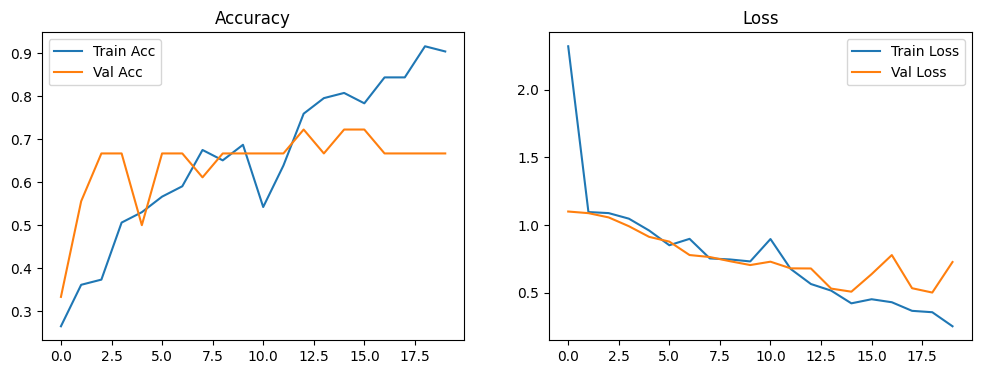

In [ ]:
#Step 7: Plot Training History
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Loss")
plt.legend()

plt.show()


In [ ]:
model.compile()  # Optional - not required for just predicting


In [ ]:
#Predict Rice Leaf Disease from New Image
import numpy as np
import cv2
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

#  Step 1: Load  trained model
model = load_model('best_rice_model.h5')

#  Step 2: Define class names (must match training order)
class_names = ['BacterialLeafBlight', 'BrownSpot', 'LeafSmut']

#  Step 3: Define prediction function
def predict_rice_leaf(img_path):
    try:
        # Load and preprocess image
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (128, 128))
        img_array = np.expand_dims(img / 255.0, axis=0)  # Normalize and add batch dimension

        # Predict
        prediction = model.predict(img_array)
        class_index = np.argmax(prediction)
        confidence = prediction[0][class_index]

        # Output
        print(f" Prediction: {class_names[class_index]}")
        print(f" Confidence: {confidence * 100:.2f}%")
    except Exception as e:
        print(" Error loading or predicting image:", str(e))

# Step 4: Test it
# Replace with your image path
predict_rice_leaf("/content/rice_leaf_dataset/BacterialLeafBlight/DSC_0374.JPG")



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
 Prediction: BacterialLeafBlight
 Confidence: 94.82%


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 462ms/step


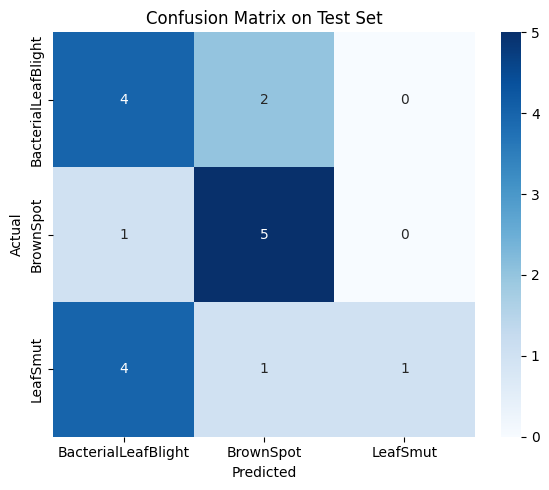


📋 Classification Report:
                     precision    recall  f1-score   support

BacterialLeafBlight       0.44      0.67      0.53         6
          BrownSpot       0.62      0.83      0.71         6
           LeafSmut       1.00      0.17      0.29         6

           accuracy                           0.56        18
          macro avg       0.69      0.56      0.51        18
       weighted avg       0.69      0.56      0.51        18



In [ ]:
#Confusion Matrix on Test Set
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict on test set

# Get predicted class indices
y_pred_probs = model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Convert one-hot encoded y_test to labels
y_true = np.argmax(y_test, axis=1)

#Confusion Matrix and Report
# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix on Test Set")
plt.tight_layout()
plt.show()

# Classification report
print("\n📋 Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))



**Apply Data Augmentation**

In [ ]:

# 1. Import Required Modules
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
#2. Create Augmentation Generator for Training
#  Augmentation config for training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)



In [ ]:
#Use Minimal Augmentation for Validation & Test
test_val_datagen = ImageDataGenerator(rescale=1./255)


In [ ]:
#3. Create Generators from Arrays
train_generator = train_datagen.flow(x_train, y_train, batch_size=32, shuffle=True)
validation_generator = test_val_datagen.flow(x_valid, y_valid, batch_size=32)
test_generator = test_val_datagen.flow(x_test, y_test, batch_size=32, shuffle=False)



In [ ]:
#Augmentation

In [ ]:
#4. Train CNN with Augmented Data
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(128, 128, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),

    Dropout(0.3),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.4),
    Dense(3, activation='softmax')  # 3 output classes
])



/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:

#compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])



In [ ]:
#  Train with augmented images
model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=20,
    callbacks=[]  # Add ModelCheckpoint if needed
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.2670 - loss: 1.1007 - val_accuracy: 0.3333 - val_loss: 1.0987
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.2677 - loss: 1.1009 - val_accuracy: 0.3333 - val_loss: 1.0986
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.3463 - loss: 1.0986 - val_accuracy: 0.3333 - val_loss: 1.0986
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.3379 - loss: 1.0986 - val_accuracy: 0.3333 - val_loss: 1.0986
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.2866 - loss: 1.1003 - val_accuracy: 0.3333 - val_loss: 1.0986
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step - accuracy: 0.3027 - loss: 1.0991 - val_accuracy: 0.3333 - val_loss: 1.0986
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.3350 - loss: 1.0982 - val_accuracy: 0.3333 - val_loss: 1.0986
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.3633 - loss: 1.0983 - val_accuracy: 0.3333 - val_loss: 1.0986
Epoch 9/20
3/3 ━

In [ ]:
#Evaluate test accuracy (no augmentation on test set)
loss, acc = model.evaluate(test_generator)
print(f" Test Accuracy after augmentation: {acc * 100:.2f}%")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 356ms/step - accuracy: 0.3333 - loss: 1.0986
 Test Accuracy after augmentation: 33.33%


**Analysis**

**CNN**: Captures spatial features well, high accuracy even with a small dataset. Generalizes better and can be fine-tuned with data augmentation.

**Random Forest**: Struggles with raw pixel data; no understanding of spatial patterns. Fast but not suitable for image classification.

**SVM**: Slightly better than Random Forest, but suffers from longer inference time and lower accurac.

* Recommendation for Production

Best Model: CNN (Convolutional Neural Network)
 Reasons:
  1. High Accuracy

  2. Robust against overfitting due to dropout

  3. Supports edge/mobile deployment (via TensorFlow Lite, ONNX)

  4. Scalable for additional rice disease classes

  5. Fast inference for real-time diagnosis



Challenges I faced is that to work with deep learning is little bit diffrent than other ML model.